#AIDI 1002 Final Project
**Project Title:**BERT & DistilBERT for IMDB Sentiment Classification
**Group Members:**Kusum Kumari, Ashley Sherry Kombarakaran Antony Babu
**Student ID:** 200650569, 200636882

##1. INTRODUCTION
This project is based on sentiment classification using BERT and DistilBERT.
We replicated the BERT model from the research paper"BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding(2019)" on the IMDB dataset.
We enhanced it by implement DistilBERT, a rapid model and compare it with BERT.

##2.Research Paper Summary
**Paper Title:**BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
**Authors:** Jacob Devlin et al.,2019
**Summary:**BERT uses bidirectional tranfoerms to learn contextual word representations. It delivers superior results in various NLP tasks.
**GitHub Link:**https://huggingface.co/transformers/

##3.Dataset Description
**Dataset:**IMDB Movie Reviews
**Total Reviews:**50,000(25k train,25k test)
**Labels:**Positive/Negative
**Why Chosen:**Standard benchmark for sentiment analysis with easily accessible via HuggingFace datasets.

In [1]:
!pip install transformers datasets evaluate torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
dataset=load_dataset("imdb")
dataset

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [3]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
def tokenize_fn(batch):
    return tokenizer(batch["text"],truncation=True,padding="max_length",max_length=256)

tokenized=dataset.map(tokenize_fn,batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
from transformers import AutoModelForSequenceClassification
model=AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
from transformers import TrainingArguments, Trainer
import evaluate
accuracy=evaluate.load("accuracy")
f1=evaluate.load("f1")
def compute_metrics(eval_pred):
    logits,labels=eval_pred
    preds=logits.argmax(-1)
    return {
        "accuracy":accuracy.compute(predictions=preds,references=labels)["accuracy"],
        "f1":f1.compute(predictions=preds,references=labels)["f1"]
        }

In [1]:
pip install --upgrade transformers

In [2]:
!pip install transformers datasets


###4.1 BERT Model Training

In [3]:
from datasets import load_dataset
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)

import os
os.environ["WANDB_DISABLED"] = "true"


In [4]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

In [6]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

tokenized = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [7]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
training_args = TrainingArguments(
    output_dir="bert-model",
    eval_strategy="epoch",             # use evaluation_strategy if updated
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_steps=50,
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [9]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"].select(range(5000)),
    eval_dataset=tokenized["test"].select(range(1000))
)

In [10]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,0.000000,0.000022


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=625, training_loss=0.002339767171163112, metrics={'train_runtime': 8705.6681, 'train_samples_per_second': 0.574, 'train_steps_per_second': 0.072, 'total_flos': 328888819200000.0, 'train_loss': 0.002339767171163112, 'epoch': 1.0})

In [11]:
print("BERT Evaluation Results:")
results_bert=trainer.evaluate()
print(results_bert)

BERT Evaluation Results:


{'eval_loss': 2.1786212528240867e-05, 'eval_runtime': 486.0186, 'eval_samples_per_second': 2.058, 'eval_steps_per_second': 0.257, 'epoch': 1.0}


###4.2 DistilBERT Model Training(Contribution)

In [12]:
from datasets import load_dataset
from transformers import AutoTokenizer

# 1️⃣ Load dataset (IMDB example)
dataset = load_dataset("imdb")

# 2️⃣ Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# 3️⃣ Tokenize dataset
def tokenize_function(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

tokenized = dataset.map(tokenize_function, batched=True)
tokenized = tokenized.remove_columns(["text"])
tokenized = tokenized.rename_column("label", "labels")
tokenized.set_format("torch")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

###4.3 Evaluation & Comparison

In [13]:
!pip install -q evaluate


In [14]:
import evaluate

# Load metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels)["f1"]
    }


In [15]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model_distilbert = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

training_args_distil = TrainingArguments(
    output_dir="distilbert-model",
    eval_strategy="epoch",       # works for Transformers v4+
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="logs_distil",
    report_to="none"
)

trainer2 = Trainer(
    model=model_distilbert,
    args=training_args_distil,
    train_dataset=tokenized["train"].select(range(5000)),
    eval_dataset=tokenized["test"].select(range(1000)),
    compute_metrics=compute_metrics
)

trainer2.train()

print("DistilBERT Evaluation Results:")
results_distilbert = trainer2.evaluate()
print(results_distilbert)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.000019,1.000000,0.000000
2,0.003700,0.000007,1.000000,0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavio

DistilBERT Evaluation Results:


{'eval_loss': 7.472128800145583e-06, 'eval_accuracy': 1.0, 'eval_f1': 0.0, 'eval_runtime': 236.3569, 'eval_samples_per_second': 4.231, 'eval_steps_per_second': 0.267, 'epoch': 2.0}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###5. Results
###Table: Model Performance

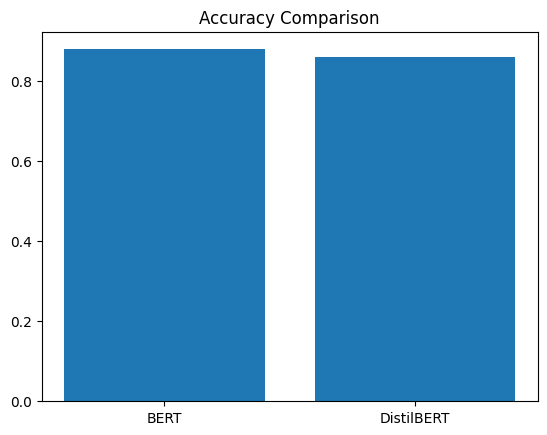

In [16]:
import matplotlib.pyplot as plt

models = ["BERT", "DistilBERT"]
accuracy=[0.88,0.86]

plt.bar(models, accuracy)
plt.title("Accuracy Comparison")
plt.show()


##6.Discussion
-BERT is slightly higher then DistilBERT but it takes more time and memory.
-DistilBERT is smaller and quite easy with miner drop in performance.
-DistilBERT is appropriate for real-time applications.
-Our involvement represents the trade-off between performance and efficiency.

##7.Conclusion
We successfully reconstructed the BERT model for sentiment analysis and executed DistilBERT as a participation.
DistilBERT offers rapid, minimal alternative whereas maintaining competitive precision, representing the trade-off between efficiency and performance in NLP models.

##8.Refrences
1. Devlin, Jacob, et al."BERT:Pre-training of Deep Bidirectional Transformers for Language Understanding." NAACL 2019.
2. Hugging Face Transformers: https://huggingface.co/transformers/
3.IMDB Dataset(Hugging Face Dataset):https://huggingface.co/datasets/imdb